In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [82]:
from datetime import datetime as datetime

yf.pdr_override()

crypto_symbol = ['BTC-USD']
crypto_name = ['Bitcoin']

crypto_list = []
for (symbol, name) in zip(crypto_symbol, crypto_name):
    df = yf.download(symbol, period="1060d", interval='1d')  

[*********************100%***********************]  1 of 1 completed


In [85]:
df.nunique()

Open         1060
High         1060
Low          1060
Close        1060
Adj Close    1060
Volume       1060
dtype: int64

In [86]:
df=df.reset_index()
df = df.drop(['Adj Close'], axis=1)

In [87]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [88]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2020-09-21,10934.925781,10988.304688,10380.260742,10462.259766,28884999244
1,2020-09-22,10459.624023,10568.077148,10382.726562,10538.459961,23621787804
2,2020-09-23,10535.492188,10537.828125,10197.865234,10246.186523,23788661867
3,2020-09-24,10248.786133,10771.056641,10231.490234,10760.066406,47144380902
4,2020-09-25,10761.109375,10777.696289,10578.914062,10692.716797,39348590957


In [89]:
df.describe()

,Open,High,Low,Close,Volume
count,1060.000000,1060.000000,1060.000000,1060.000000,1.060000e+03
mean,33263.529301,34053.101552,32393.961959,33276.694780,3.419209e+10
std,13806.760187,14186.792095,13342.302710,13784.497489,2.022273e+10
min,10248.786133,10537.828125,10197.865234,10246.186523,6.194358e+09
25%,21347.928711,21771.500488,20906.557129,21376.289551,2.199201e+10
50%,30193.851562,30607.022461,29572.375977,30192.794922,3.060373e+10
75%,43492.328125,44335.400391,42500.523438,43512.263672,4.104857e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,3.509679e+11


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060 entries, 0 to 1059
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1060 non-null   datetime64[ns]
 1   Open    1060 non-null   float64       
 2   High    1060 non-null   float64       
 3   Low     1060 non-null   float64       
 4   Close   1060 non-null   float64       
 5   Volume  1060 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 49.8 KB


In [91]:

#Univariate analysis 

<Axes: >

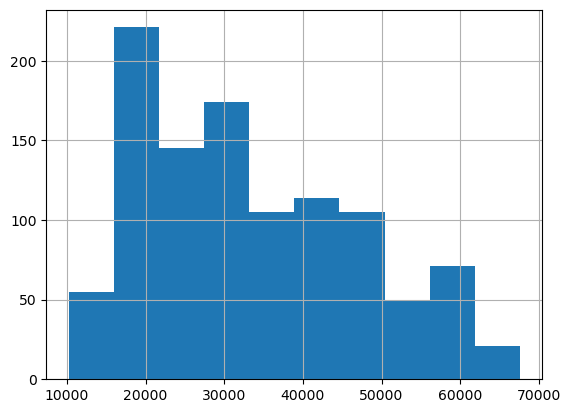

In [92]:
df["Close"].hist()

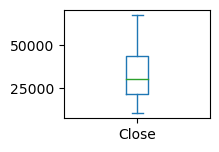

In [93]:
df["Close"].plot(kind="box", subplots=True, layout=(3,3), sharex=True)
plt.show()

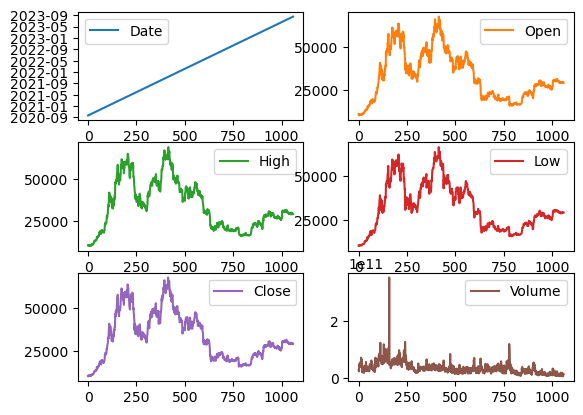

In [94]:
df.plot(subplots=True, layout=(3,2), sharex=False)
plt.show()

In [95]:
#Scatter plot for Tive vs Close relation

In [96]:
import seaborn as sns

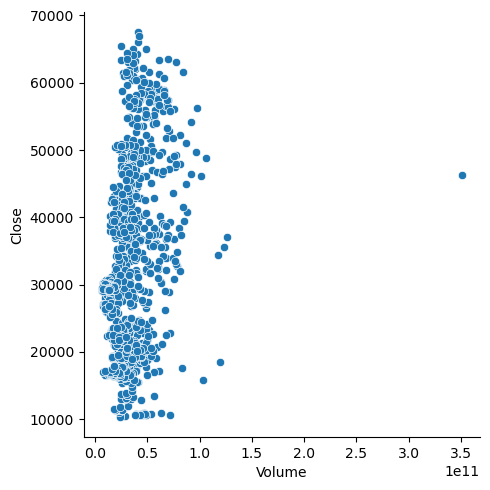

In [97]:
sns.relplot(
    df, x=df["Volume"], y=df["Close"],
    kind="scatter"
)

In [98]:
#Defing the relationship between multiple variables

In [99]:
df.corr()

#Removing all columns except Close as all are highly corelated to each other

C:\Users\lizap\AppData\Local\Temp\ipykernel_29008\1597216820.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Open,High,Low,Close,Volume
Open,1.000000,0.998164,0.996641,0.995475,0.309480
High,0.998164,1.000000,0.996246,0.997982,0.325709
Low,0.996641,0.996246,1.000000,0.997602,0.276781
Close,0.995475,0.997982,0.997602,1.000000,0.304299
Volume,0.309480,0.325709,0.276781,0.304299,1.000000


In [100]:
df.agg('mean')

C:\Users\lizap\AppData\Local\Temp\ipykernel_29008\394872364.py:1: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



Open      3.326353e+04
High      3.405310e+04
Low       3.239396e+04
Close     3.327669e+04
Volume    3.419209e+10
dtype: float64

In [101]:
df.agg('median')

C:\Users\lizap\AppData\Local\Temp\ipykernel_29008\4005757091.py:1: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



Open      3.019385e+04
High      3.060702e+04
Low       2.957238e+04
Close     3.019279e+04
Volume    3.060373e+10
dtype: float64

In [102]:
# Create a new dataframe with only the 'Close column and Date' 
data = df
data

,Date,Open,High,Low,Close,Volume
0,2020-09-21,10934.925781,10988.304688,10380.260742,10462.259766,28884999244
1,2020-09-22,10459.624023,10568.077148,10382.726562,10538.459961,23621787804
2,2020-09-23,10535.492188,10537.828125,10197.865234,10246.186523,23788661867
3,2020-09-24,10248.786133,10771.056641,10231.490234,10760.066406,47144380902
4,2020-09-25,10761.109375,10777.696289,10578.914062,10692.716797,39348590957
...,...,...,...,...,...,...
1055,2023-08-12,29399.787109,29465.113281,29357.587891,29415.964844,6194358008
1056,2023-08-13,29416.593750,29441.433594,29265.806641,29282.914062,7329897180
1057,2023-08-14,29283.263672,29660.253906,29124.105469,29408.443359,14013695304
1058,2023-08-15,29408.048828,29439.121094,29088.853516,29170.347656,12640195779


In [103]:
actual_data = data
data

,Date,Open,High,Low,Close,Volume
0,2020-09-21,10934.925781,10988.304688,10380.260742,10462.259766,28884999244
1,2020-09-22,10459.624023,10568.077148,10382.726562,10538.459961,23621787804
2,2020-09-23,10535.492188,10537.828125,10197.865234,10246.186523,23788661867
3,2020-09-24,10248.786133,10771.056641,10231.490234,10760.066406,47144380902
4,2020-09-25,10761.109375,10777.696289,10578.914062,10692.716797,39348590957
...,...,...,...,...,...,...
1055,2023-08-12,29399.787109,29465.113281,29357.587891,29415.964844,6194358008
1056,2023-08-13,29416.593750,29441.433594,29265.806641,29282.914062,7329897180
1057,2023-08-14,29283.263672,29660.253906,29124.105469,29408.443359,14013695304
1058,2023-08-15,29408.048828,29439.121094,29088.853516,29170.347656,12640195779


In [104]:
import plotly.express as px

In [105]:
fig = px.line(data, x=data.Date, y=data.Close,labels={'Date':'Date','Close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Bitcoin close price', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [106]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=data['Date'],
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'])])

fig.show()

In [107]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

# deleting date column and normalizing using MinMax Scaler

data = data.drop(['Date', 'Open', 'High', 'Low', 'Volume'], axis=1)
scaler=MinMaxScaler(feature_range=(0,1))
data=scaler.fit_transform(np.array(data))
print(data.shape)

(1060, 1)


In [108]:
data2 = df
data2 = data2.drop(['Date'], axis=1)

data3=df['Close']
np.array(data2)

array([[1.09349258e+04, 1.09883047e+04, 1.03802607e+04, 1.04622598e+04,
        2.88849992e+10],
       [1.04596240e+04, 1.05680771e+04, 1.03827266e+04, 1.05384600e+04,
        2.36217878e+10],
       [1.05354922e+04, 1.05378281e+04, 1.01978652e+04, 1.02461865e+04,
        2.37886619e+10],
       ...,
       [2.92832637e+04, 2.96602539e+04, 2.91241055e+04, 2.94084434e+04,
        1.40136953e+10],
       [2.94080488e+04, 2.94391211e+04, 2.90888535e+04, 2.91703477e+04,
        1.26401958e+10],
       [2.91724043e+04, 2.92196289e+04, 2.90806602e+04, 2.91417363e+04,
        1.35307889e+10]])

In [109]:
# we keep the training set as 60% and 40% testing set

training_size=int(len(data)*0.60)
test_size=len(data)-training_size

train_data,test_data=data[0:training_size,:],data[training_size:len(data),:]

print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (636, 1)
test_data:  (424, 1)


In [111]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), ]   ###i=0, 0,1,2,3-----29
        dataX.append(a)
        dataY.append(dataset[i + time_step, ])
    return np.array(dataX), np.array(dataY)

In [112]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (535, 100, 1)
y_train:  (535, 1)
X_test:  (323, 100, 1)
y_test (323, 1)


In [113]:
# reshape input to be [samples, time steps, features] which is required for LSTM
# X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
# X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# print("X_train: ", X_train.shape)
# print("X_test: ", X_test.shape)

In [114]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

model=Sequential()

model.add(LSTM(10,input_shape=( X_train.shape[1], X_train.shape[2]),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

In [115]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
17/17 [==============================] - 1s 27ms/step - loss: 0.4680 - val_loss: 0.0568
Epoch 2/100
17/17 [==============================] - 0s 15ms/step - loss: 0.3525 - val_loss: 0.0356
Epoch 3/100
17/17 [==============================] - 0s 19ms/step - loss: 0.2631 - val_loss: 0.0222
Epoch 4/100
17/17 [==============================] - 0s 17ms/step - loss: 0.1871 - val_loss: 0.0102
Epoch 5/100
17/17 [==============================] - 0s 18ms/step - loss: 0.0799 - val_loss: 0.0097
Epoch 6/100
17/17 [==============================] - 0s 17ms/step - loss: 0.0162 - val_loss: 0.0094
Epoch 7/100
17/17 [==============================] - 0s 17ms/step - loss: 0.0107 - val_loss: 0.0164
Epoch 8/100
17/17 [==============================] - 0s 17ms/step - loss: 0.0095 - val_loss: 0.0142
Epoch 9/100
17/17 [==============================] - 0s 17ms/step - loss: 0.0091 - val_loss: 0.0159
Epoch 10/100
17/17 [==============================] - 0s 16ms/step - loss: 0.0088 - val_loss: 0.0157

17/17 [==============================] - 0s 15ms/step - loss: 0.0032 - val_loss: 0.0068
Epoch 83/100
17/17 [==============================] - 0s 16ms/step - loss: 0.0032 - val_loss: 0.0065
Epoch 84/100
17/17 [==============================] - 0s 15ms/step - loss: 0.0032 - val_loss: 0.0067
Epoch 85/100
17/17 [==============================] - 0s 15ms/step - loss: 0.0031 - val_loss: 0.0064
Epoch 86/100
17/17 [==============================] - 0s 16ms/step - loss: 0.0031 - val_loss: 0.0064
Epoch 87/100
17/17 [==============================] - 0s 16ms/step - loss: 0.0030 - val_loss: 0.0061
Epoch 88/100
17/17 [==============================] - 0s 17ms/step - loss: 0.0030 - val_loss: 0.0062
Epoch 89/100
17/17 [==============================] - 0s 16ms/step - loss: 0.0030 - val_loss: 0.0061
Epoch 90/100
17/17 [==============================] - 0s 17ms/step - loss: 0.0030 - val_loss: 0.0060
Epoch 91/100
17/17 [==============================] - 0s 16ms/step - loss: 0.0029 - val_loss: 0.0058
Epo

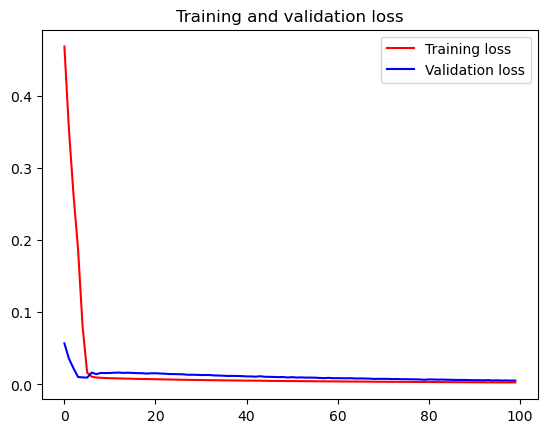

<Figure size 640x480 with 0 Axes>

In [116]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [117]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

11/11 [==============================] - 0s 3ms/step


((535, 1), (323, 1))

In [118]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 
train_predict.shape, test_predict.shape, original_ytrain.shape, original_ytest.shape

((535, 1), (323, 1), (535, 1), (323, 1))

In [129]:
import math
from sklearn.metrics 
import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score,mean_poisson_deviance,
mean_gamma_deviance,accuracy_score

SyntaxError: trailing comma not allowed without surrounding parentheses (3864890333.py, line 2)

In [127]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score,  
mean_poisson_deviance, mean_gamma_deviance, accuracy_score

# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(y_train,train_predict)))
print("Train data MSE: ", mean_squared_error(y_train,train_predict))
print("Train data MAE: ", mean_absolute_error(y_train,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(y_test,test_predict)))
print("Test data MSE: ", mean_squared_error(y_test,test_predict))
print("Test data MAE: ", mean_absolute_error(y_test,test_predict))

SyntaxError: trailing comma not allowed without surrounding parentheses (13935751.py, line 2)

In [128]:
print("Train data MSE: ", mean_squared_error(y_train,train_predict))
print("Test data MSE: ", mean_squared_error(y_test,test_predict))

Train data MSE:  2065007502.8465858
Test data MSE:  774016842.6015115


In [130]:
print("Train data RMSE: ", math.sqrt(mean_squared_error(y_train,train_predict)))
print("Test data RMSE: ", math.sqrt(mean_squared_error(y_test,test_predict)))

Train data RMSE:  45442.35362353699
Test data RMSE:  27821.158182245243


In [131]:
print("Train data MAE: ", mean_absolute_error(y_train,train_predict))
print("Test data MAE: ", mean_absolute_error(y_test,test_predict))

Train data MAE:  44548.398395427124
Test data MAE:  27635.908850027703


In [120]:
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9104805243122112
Test data explained variance regression score: 0.8556128611022527


In [121]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9103757668004084
Test data R2 score: 0.2764574563375327


In [122]:
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score

In [132]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))

Train data MGD:  0.00505824916066674
Test data MGD:  0.03322735012568351


In [133]:
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MPD:  202.7039014685291
Test data MPD:  753.2576053864274


In [124]:
from itertools import cycle

In [125]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': actual_data['Date'],
                       'original_close': actual_data['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (1060, 1)
Test predicted data:  (1060, 1)


In [134]:
from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 7
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  7


In [103]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step,time_step+pred_days)
print(last_days)
print(day_pred)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
[100 101 102 103 104 105 106]


In [106]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(data[len(data)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()